In [37]:
# import requried libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# load and read dataset
dataset = pd.read_excel('final_dataset.xlsx')
dataset.head()

Red_Mean  Red_Median  Red_Variance    Red_Std  Green_Mean  Green_Median  \
0  121.849594       145.0   3304.497718  57.484761  125.967102         135.0   
1  103.830032       102.0   2152.241390  46.392256  114.606018         121.0   
2  116.047089       134.0   2488.556041  49.885429  119.544250         125.0   
3  136.331741       139.0   1649.347666  40.612162  147.529755         151.0   
4  129.850250       134.0   1940.935613  44.056051  131.718399         139.0   

   Green_Variance  Green_Std   Blue_Mean  Blue_Median  Blue_Variance  \
0     1763.033006  41.988487  111.251572        134.0    3330.577657   
1     1838.561514  42.878450   95.103455         88.0    3073.705972   
2     1193.293666  34.544083  100.909332        119.0    2621.018971   
3     1412.353454  37.581291  126.857681        129.0    2512.158838   
4     1782.426972  42.218799  101.312119         94.0    2798.758005   

    Blue_Std  label  
0  57.711157      0  
1  55.441013      1  
2  51.195888      0  
3  50.121441      1  
4  52.903289      1

In [4]:
# descriptive statistics
dataset.describe()

Red_Mean   Red_Median  Red_Variance      Red_Std   Green_Mean  \
count  5702.000000  5702.000000   5702.000000  5702.000000  5702.000000   
mean    126.866256   134.084707   2354.106217    47.866691   131.394668   
std      21.349339    25.988085    776.792043     7.930773    22.146187   
min      72.897812    56.000000    518.185390    22.763686    78.858002   
25%     114.593369   119.000000   1798.977901    42.414360   118.017010   
50%     125.856995   134.000000   2282.452842    47.775023   128.989677   
75%     136.507111   146.000000   2776.939211    52.696672   141.508694   
max     246.597122   255.000000   5933.460280    77.028957   251.254089   

       Green_Median  Green_Variance    Green_Std    Blue_Mean  Blue_Median  \
count   5702.000000     5702.000000  5702.000000  5702.000000  5702.000000   
mean     139.512539     1892.401002    42.468821   111.773510   116.321905   
std       24.043098      807.389979     9.424215    19.837836    25.417473   
min       82.000000      259.989089    16.124177    58.766464    37.000000   
25%      125.000000     1284.345478    35.837766   100.909451   102.000000   
50%      137.000000     1792.696035    42.340241   110.126236   114.000000   
75%      151.000000     2423.053734    49.224523   119.115005   126.000000   
max      255.000000     4775.445991    69.104602   235.422943   255.000000   

       Blue_Variance     Blue_Std        label  
count    5702.000000  5702.000000  5702.000000  
mean     2898.407095    53.288393     1.020168  
std       816.039576     7.665804     0.812190  
min       517.141674    22.740749     0.000000  
25%      2304.471245    48.004909     0.000000  
50%      2882.111371    53.685299     1.000000  
75%      3438.022143    58.634650     2.000000  
max      9020.131135    94.974371     2.000000

In [5]:
# find further info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Red_Mean        5702 non-null   float64
 1   Red_Median      5702 non-null   float64
 2   Red_Variance    5702 non-null   float64
 3   Red_Std         5702 non-null   float64
 4   Green_Mean      5702 non-null   float64
 5   Green_Median    5702 non-null   float64
 6   Green_Variance  5702 non-null   float64
 7   Green_Std       5702 non-null   float64
 8   Blue_Mean       5702 non-null   float64
 9   Blue_Median     5702 non-null   float64
 10  Blue_Variance   5702 non-null   float64
 11  Blue_Std        5702 non-null   float64
 12  label           5702 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 579.2 KB


In [9]:
# now lets find correlation with respect to target columns
corr = dataset.corr()['label']

In [11]:
# find index of corr
indx = corr.index
indx

Index(['Red_Mean', 'Red_Median', 'Red_Variance', 'Red_Std', 'Green_Mean',
       'Green_Median', 'Green_Variance', 'Green_Std', 'Blue_Mean',
       'Blue_Median', 'Blue_Variance', 'Blue_Std', 'label'],
      dtype='object')

In [12]:
# values with respect to that index
vals = corr.values
vals

array([-0.16256157, -0.16842281, -0.50731827, -0.50488445, -0.27217294,
       -0.31741671, -0.28347608, -0.27681481, -0.2269145 , -0.22531161,
       -0.31674597, -0.31050719,  1.        ])

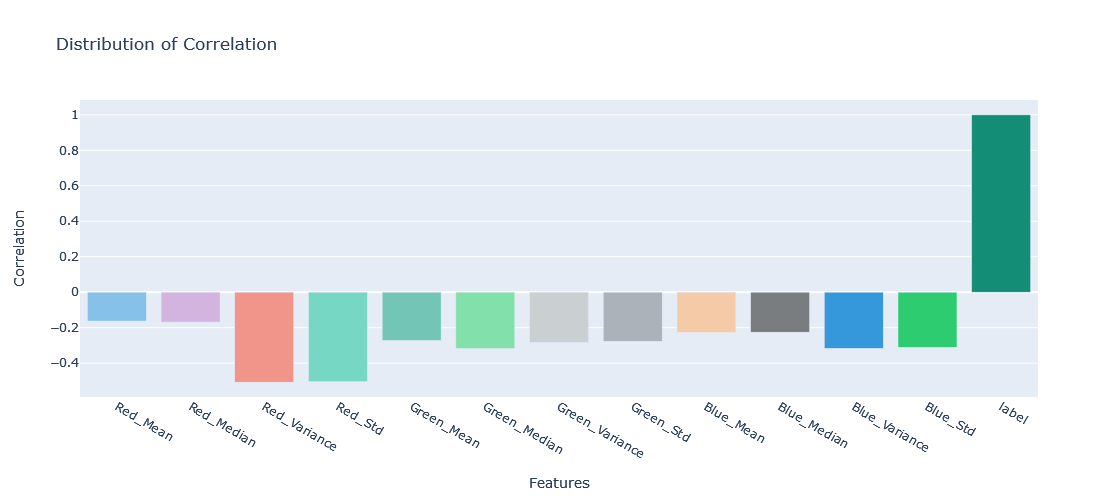

In [17]:
# plot a graph to show distribution of correlation
fig = go.Figure()

# specify colors
colors = ['#85c1e9', '#d2b4de', '#f1948a', '#76d7c4', '#73c6b6', '#82e0aa', '#cacfd2', '#abb2b9', '#f5cba7', '#797d7f', '#3498db', '#2ecc71', '#138d75']

fig.add_trace(go.Bar(x = indx, y = vals, marker = dict(color = colors)))
fig.update_layout(title = 'Distribution of Correlation', xaxis_title = 'Features', yaxis_title = 'Correlation', height = 500)
fig.show()

## Implement Logistic Regression

In [32]:
# distribute dataset into dependent and independent variables of x and y
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [33]:
# resclae features to properly fit model
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [34]:
# now split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [36]:
# import model
lr = LogisticRegression(max_iter = 1000)

# fit model
lr.fit(x_train, y_train)

# predict values
y_pred = lr.predict(x_test)
y_pred

array([2, 0, 2, ..., 2, 2, 1], dtype=int64)

In [38]:
# find accuracy
accuracy_score(y_test, y_pred)

0.9000876424189308

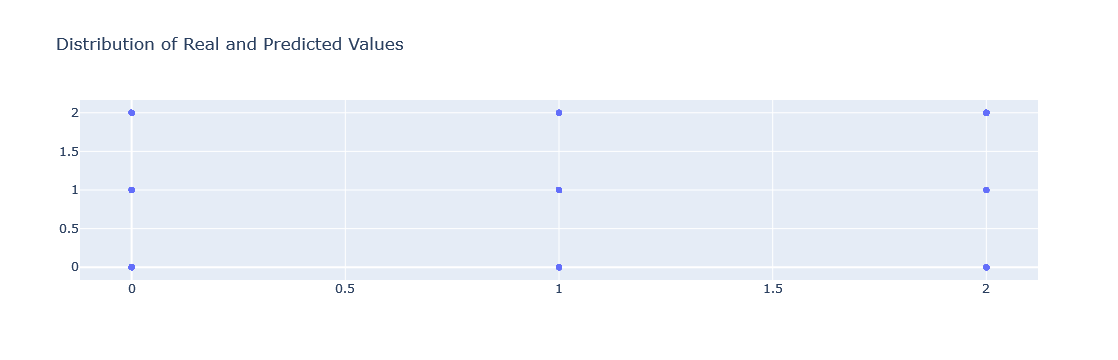

In [40]:
# scatter plot to shoe distribution of y_test and y_pred
fig = go.Figure()

fig.add_trace(go.Scatter(x = y_test, y = y_pred, mode = 'markers'))
fig.update_layout(title = 'Distribution of Real and Predicted Values')
fig.show()

In [47]:
# print some values from both y_test and y_pred
array1 =  y_test[0 : 30]
array2 = y_pred[0 : 30]

print(np.array(array1))
print(array2)

[2 0 2 2 2 2 1 0 1 1 1 1 0 0 0 2 0 1 2 0 2 2 1 0 0 2 1 0 0 1]
[2 0 2 2 2 2 1 0 1 1 1 0 0 0 0 2 2 1 2 0 2 2 1 0 0 2 1 0 0 1]


In [52]:
len(y_test)

1141

In [53]:
len(y_pred)

1141

In [48]:
# check using a for loop either both y_test and y_pred matches or not
for i in y_test:
    for j in y_pred:
        if (i == j):
            print('True')
        else:
            print('False')

True
False
True
True
True
True
False
False
False
False
False
False
False
False
False
True
True
False
True
False
True
True
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
True
False
False
False
True
False
False
True
False
True
False
True
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
True
False
True
True
False
True
True
True
False
False
False
True
True
False
True
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
True
False
False
False
True
True
False
True
False
False
False
False
False
False
True
True
False
False
False
True
True
False
False
True
True
False
False
True
False
False
False
False
True
False
False
False
True
False
True
True
False
True
False
True
False
True
True
False
False
False
False
True
True
False
False
True
False
False
False
False
False
Fa

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [54]:
# iterate in two lists using zip
count = 0
true = 0
false = 0
for i, j in zip(y_test, y_pred):
    count = count + 1
    if (i == j):
        print('True')
        true = true + 1
    else:
        print('False')
        false = false + 1

print(count)
print(true)
print(false)

True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
False
False
True
False
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
True
True
False
True
True
False
False
True
False
True
True
True
True
True
True
False
True
True

In [55]:
# now find percentage of true and false
true_percentage = (true/len(y_test)) * 100
false_percentage = (false/len(y_test))* 100
print('Percentage of True values is', true_percentage)
print('Percentage of False values is', false_percentage)

Percentage of True values is 90.00876424189308
Percentage of False values is 9.991235758106924


## Implement PCA

In [106]:
# apply PCA
pca = PCA()

new_x = pca.fit_transform(x)

# make a dataframe of new features created after applying PCA
new_dataset = pd.DataFrame(new_x)

new_dataset.head()

0         1         2         3         4         5         6   \
0  0.808246 -1.026145  1.395135  0.336130 -0.108153  0.783636  0.074888   
1 -1.942872 -1.176892 -0.399414  0.644892 -0.379861 -0.375231 -0.031084   
2 -1.134501  0.261897  0.944380  0.489868  0.140258  0.650079  0.127338   
3  0.313089  2.015655 -0.322812 -0.028859 -0.244035 -0.397690 -0.030873   
4 -0.644835  0.162034 -0.843724  0.341052  0.560658 -0.162187 -0.072524   

         7         8         9         10        11  
0 -0.087300  0.051904 -0.040851  0.010626  0.110895  
1 -0.110037  0.067037  0.003213  0.011881 -0.014128  
2 -0.093309  0.009100 -0.068544 -0.021395  0.027531  
3 -0.081253 -0.049448 -0.036772  0.015022  0.031944  
4 -0.032152  0.046480  0.008092  0.011915  0.027582

In [112]:
# find no of components
pca.n_components_

12

In [113]:
# explain variance
pca.explained_variance_ratio_

array([4.92210620e-01, 3.98666488e-01, 4.95695742e-02, 2.79052357e-02,
       1.51191719e-02, 1.15673736e-02, 2.37277193e-03, 1.13883045e-03,
       6.11021650e-04, 3.92877250e-04, 2.84635324e-04, 1.61400224e-04])

In [107]:
# apply scaler
new_dataset = scaler.fit_transform(new_dataset)

In [108]:
# length of new dataset
len(new_dataset)

5702

In [109]:
# split data again into training and testing
new_x_train, new_x_test, y_train, y_test = train_test_split(new_dataset, y, test_size = 0.2, random_state = 30)

In [110]:
# apply logistic on data which is obtained after applying PCA
lr1 = LogisticRegression(max_iter = 1000)

lr1.fit(new_x_train, y_train)

y_pred1 = lr1.predict(new_x_test)

In [111]:
# find accuracy after applying PCA
accuracy_score(y_test, y_pred1)

0.9044697633654689